# Анализ гипитез для интернет-магазина

В ходе работы предстоит провести приотизацию гипотез, просвести A/B тесты и проанализировать их. Для этого будет необходимо построить различные графики и произвести расчеты.

## Содержание

2 Приоритизация гипотез

    2.1 Импортируем библиотеки
    
    2.2 Подготовка таблицы hypothesis
    
        2.2.1 Изучаем данные таблицы
        
        2.2.2 Смотрим типы данных
        
        2.2.3 Проверяем на пропуски
        
        2.2.4 Проверяем на дубликаты
        
        2.2.5 Корректируем таблицу
        
    2.3 Применим фреймворк ICE для приоритизации гипоте.
    
    2.4 Применим фреймворк RICE для приоритизации гипоте.
    
    2.5 Как изменилась приоритизация гипотез при применении RICE вместо ICE
    
3 Анализ A/B-теста

    3.1 Подготовка таблицы orders

        3.1.1 Изучаем данные таблицы
        
        3.1.2 Смотрим типы данных
        
        3.1.3 Проверяем на пропуски
        
        3.1.4 Проверяем на дубликаты
        
        3.1.5 Корректируем таблицу
        
    3.2 Подготовка таблицы visitors
    
        3.2.1 Изучаем данные таблицы
        
        3.2.2 Смотрим типы данных
        
        3.2.3 Проверяем на пропуски
        
        3.2.4 Проверяем на дубликаты
        
        3.2.5 Корректируем таблицу
        
    3.3 Проверка групп на пересечение
    
    3.4 Построим график кумулятивной выручки по группам.

    3.5 Построим график кумулятивного среднего чека по группам.

    3.6 Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

    3.7 Построим график кумулятивного среднего количества заказов на посетителя по группам.

    3.8 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

    3.9 Построим точечный график количества заказов по пользователям.

    3.10 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

    3.11 Построим точечный график стоимостей заказов.

    3.12 Посчитаем 95-й и 99-й перцентили стоимости заказов.

    3.13 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

    3.14 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

    3.15 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

    3.16 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

    3.17 Примем решение по результатам теста и объясните его.

    3.18 Итоговый вывод

## Приоритизация гипотез

### Импортируем библиотеки

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Подготовка таблицы hypothesis

#### Изучаем данные таблицы

In [3]:
pd.set_option('max_colwidth', 150)
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### Смотрим типы данных

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


#### Проверяем на пропуски

In [5]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

#### Проверяем на дубликаты

In [6]:
hypothesis.duplicated().sum()

0

_Вывод:_ В таблице hypothesis необходимо превести названия столбцов к одному регистру. Пропусков и дубликатов нет.

#### Корректируем таблицу

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипоте.

In [8]:
hypothesis['ice'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
hypothesis[['ice', 'hypothesis']].sort_values(by='ice', ascending=False)

,ice,hypothesis
8,16.20,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.33,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.20,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.00,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.00,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.00,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.33,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.12,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.00,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


Приоритетные гипотезы: 8, 0, 7. 

### Применим фреймворк RICE для приоритизации гипоте.

In [9]:
hypothesis['rice'] = (hypothesis['reach']  * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Приоритетные гипотезы: 7, 2, 0. 

### Как изменилась приоритизация гипотез при применении RICE вместо ICE

При применении фреймворка ICE приотизация была: 8, 0, 7. А при применении фреймворка RICE 7, 2, 0. Отличия в топах методов связано с тем, что фреймворк RICE учитывает параметр Reach, который показывает охват пользователей, которых заденет измененние. В фреймворке ICE этот параметр не учитывается.

_**Вывод по пункту:**_ Так, мы провели подготовку таблицы hypothesis. Выяснили, что в ней нет дубликатов и повторов, привели названия колонок к одному регистру. Применили фреймворки ICE и RICE. При применении фреймворка ICE приотизация была: 8, 0, 7. А при применении фреймворка RICE 7, 2, 0. Отличия в топах методов связано с тем, что фреймворк RICE учитывает параметр Reach, который показывает охват пользователей, которых заденет измененние. В фреймворке ICE этот параметр не учитывается.

## Анализ A/B-теста

### Подготовка таблицы orders

#### Изучаем данные таблицы

In [10]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


#### Смотрим типы данных

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Необходимо изменить тип колонки date на datetime64. И привести скорректировать названия столбцов.

#### Проверяем на пропуски

In [12]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

#### Проверяем на дубликаты

In [13]:
orders.duplicated().sum()

0

_Вывод:_ В таблице orders необходимо изменить тип колонки date на datetime64. Пропусков и дубликатов нет.

#### Корректируем таблицу

In [14]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [15]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


### Подготовка таблицы visitors

#### Изучаем данные таблицы

In [17]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


#### Смотрим типы данных

In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Необходимо изменить тип колонки date на datetime64.

#### Проверяем на пропуски

In [19]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

#### Проверяем на дубликаты

In [20]:
visitors.duplicated().sum()

0

_Вывод:_ В таблице visitors необходимо изменить тип колонки date на datetime64. Пропусков и дубликатов нет.

#### Корректируем таблицу

In [21]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [22]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**_Вывод:_** Мы провели подготовку таблиц orders и visitors. В которых мы изменили форматы некоторых ячеек на datetime64 и изменили названия колонок (привели к одному регистру и добавили "_ "). Дубликатов и пропусков нет.

### Проверка групп на пересечение

In [23]:
visitors_a = set(orders [orders ["group"] == "A"]["visitor_id"].unique ())
visitors_b = set(orders[orders ["group"] == "B"]["visitor_id"].unique())
visitors_ab = visitors_a.intersection(visitors_b)

print (f'Количество пользователей в данных Orders (A): {len(visitors_a)}') 
print (f'Количество пользователей в данных Orders (B): {len(visitors_b)}')
print(f'Количество пересекающихся пользователей между группами А и B: {len (visitors_ab)}')

Количество пользователей в данных Orders (A): 503
Количество пользователей в данных Orders (B): 586
Количество пересекающихся пользователей между группами А и B: 58


Посчитаем, какой процент от всех пользователей составляют пользователи, входящие в обе группы.

In [24]:
visitors_all = orders['visitor_id'].nunique()
print(f'Процент пользователей из обеих групп: {(len(visitors_ab)/visitors_all)*100}')

Процент пользователей из обеих групп: 5.625606207565471


Так как доля пользователей из обеих групп составляет 5,6%, что больше 1%, эти данные могут значительно повлиять на результат и их следует удалить.

In [25]:
orders = orders[~orders['visitor_id'].isin(visitors_ab)]

In [26]:
visitors_a = set(orders [orders ["group"] == "A"]["visitor_id"].unique ())
visitors_b = set(orders[orders ["group"] == "B"]["visitor_id"].unique())
visitors_ab = visitors_a.intersection (visitors_b)
print (f'Количество пользователей в данных Orders (A) после удаления: {len(visitors_a)}') 
print (f'Количество пользователей в данных Orders (B) после удаления: {len(visitors_b)}')
print(f'Количество пересекающихся пользователей между группами А и В после удаления: {len (visitors_ab)}')

Количество пользователей в данных Orders (A) после удаления: 445
Количество пользователей в данных Orders (B) после удаления: 528
Количество пересекающихся пользователей между группами А и В после удаления: 0


**_Вывод:_** мы провели проверку на пересечение групп, в ходе которой выяснилось, что 58 пользователей входят в обе группы. Так как доля пользователей из обеих групп составляет 5,6%, что больше 1%, эти данные могут значительно повлиять на результат. Поэтому мы их удалили.

### Построим график кумулятивной выручки по группам

In [27]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transaction_id' : pd.Series.nunique, 
                                          'visitor_id' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


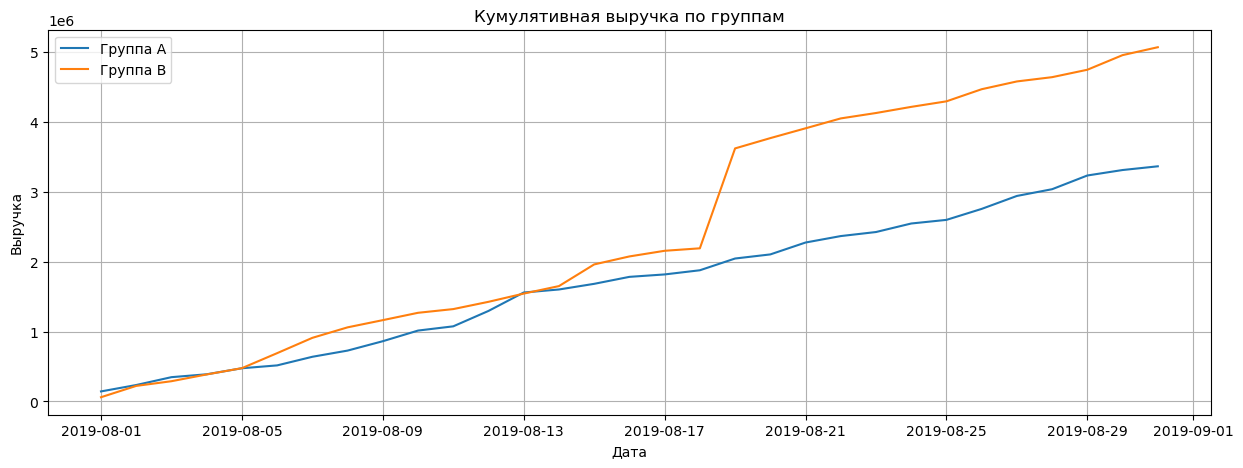

In [28]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title("Кумулятивная выручка по группам")
plt.grid()
plt.legend() 
plt.show()

_**Вывод:**_ Выручка в группе В в первой половине месяца росла чуть быстрее группы А. Затем, 19.08.2019 выручка в группе В резко поднялась. Скорее всего это связано с большим количеством заказов в этот период или же с крупными заказами.

Проверим количество заказов в этот день

In [29]:
cumulativeRevenueB

,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89
11,2019-08-06,690490,112
13,2019-08-07,909654,135
15,2019-08-08,1059795,157
17,2019-08-09,1162961,176
19,2019-08-10,1268123,198


Количество заказов не отличалось резким скачком, значит возможно дело в крупном заказе. Посмотрим заказы в этот день.

In [30]:
orders.query('date == "2019-08-19"').sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A
463,4170537404,290022471,2019-08-19,16480,B
531,4016435970,4017075195,2019-08-19,13390,A
318,3412626998,3282099314,2019-08-19,11985,A


Действительно, в этот день был аномально крупный заказ 425, что и повлияло на резкий скачок выручке в группе В.

### Построим график кумулятивного среднего чека по группам

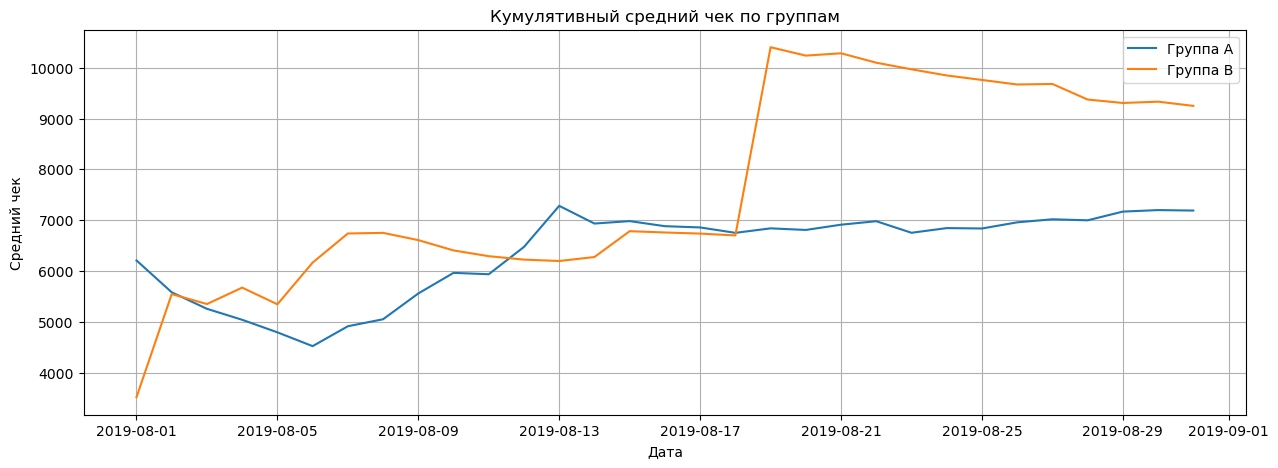

In [31]:
plt.figure(figsize=(15,5))

plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Группа B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title("Кумулятивный средний чек по группам")
plt.legend() ;

_**Вывод:**_ Аналогично графику кумулякотивной выручке наблюдается резкий скачок в группе В 19.08.2019, связанный с аномалией. В первой поломине периода группа В немного преобладала, хотя в некоторые дни группа А опережала группу В по среднему чеку.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

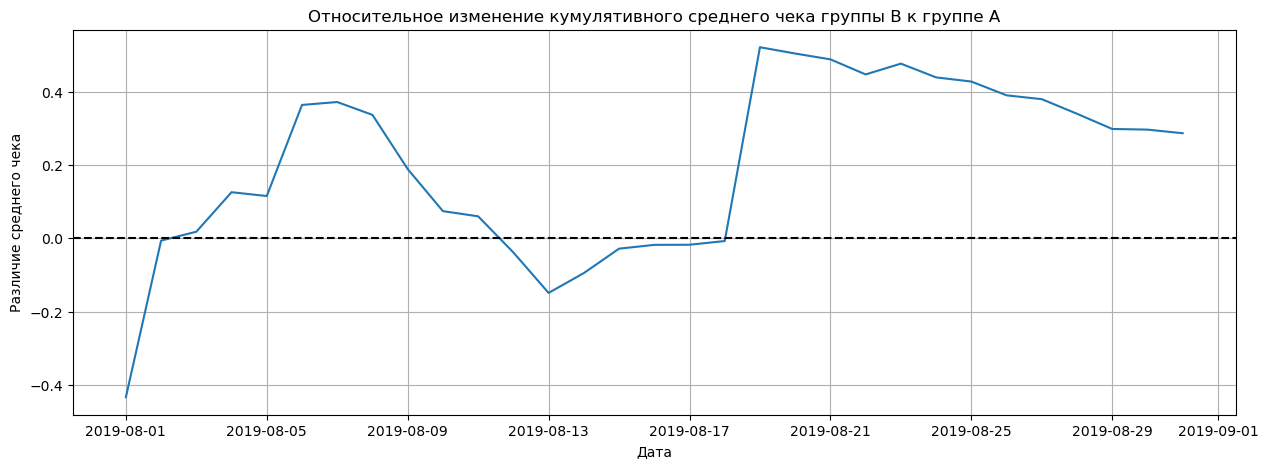

In [32]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Различие среднего чека')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')

_**Вывод:**_ В основном график находится выше 0 и группа В преобладает. Только в период с 12.08.2019 по 18.08.2019 график находится ниже 0 и средний чек группы А был соответственно больше группы В. Аналогично педидущим двум графика наблюдается резкий скачок в группе В 19.08.2019, связанный с аномалией.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

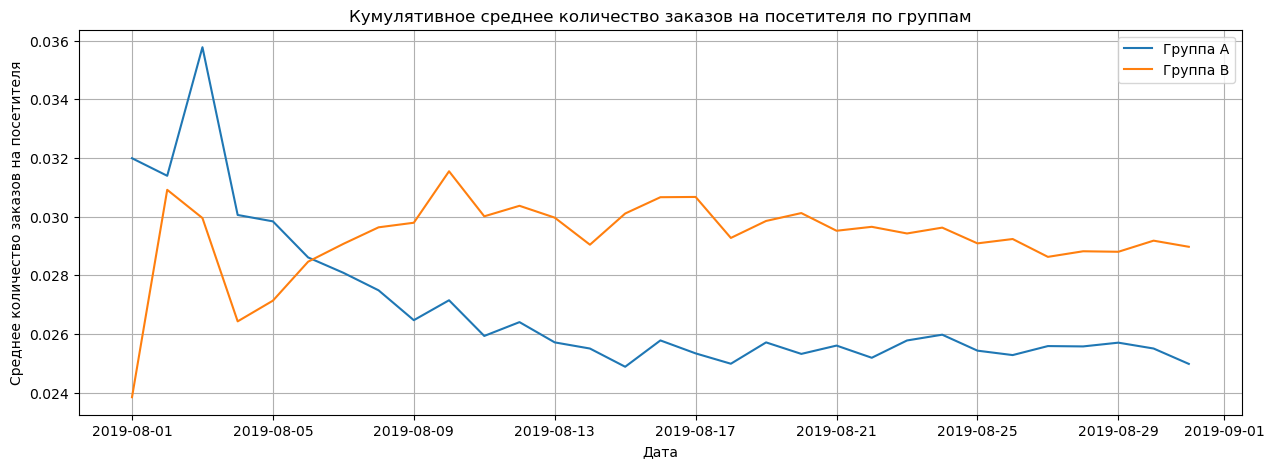

In [33]:
cumulativeV_A = cumulativeData[cumulativeData['group']=='A'][['date','orders', 'visitors']]
cumulativeV_B = cumulativeData[cumulativeData['group']=='B'][['date','orders', 'visitors']]

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeV_A['date'], cumulativeV_A['orders']/cumulativeV_A['visitors'], label='Группа A')
plt.plot(cumulativeV_B['date'], cumulativeV_B['orders']/cumulativeV_B['visitors'], label='Группа B')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend();

_**Вывод:**_ В начале выбранного периода среднее количество заказов на посетителя группы А было больше, чем у В. Затем показатель группы А начал резко падать, а группы В наоборот расти. С середины периода среднее количество заказов на посетителя начинает стабилизироваться в обоих группах. В целом, можно сказать, что среднее количество заказов на посетителя группы В больше группы А.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

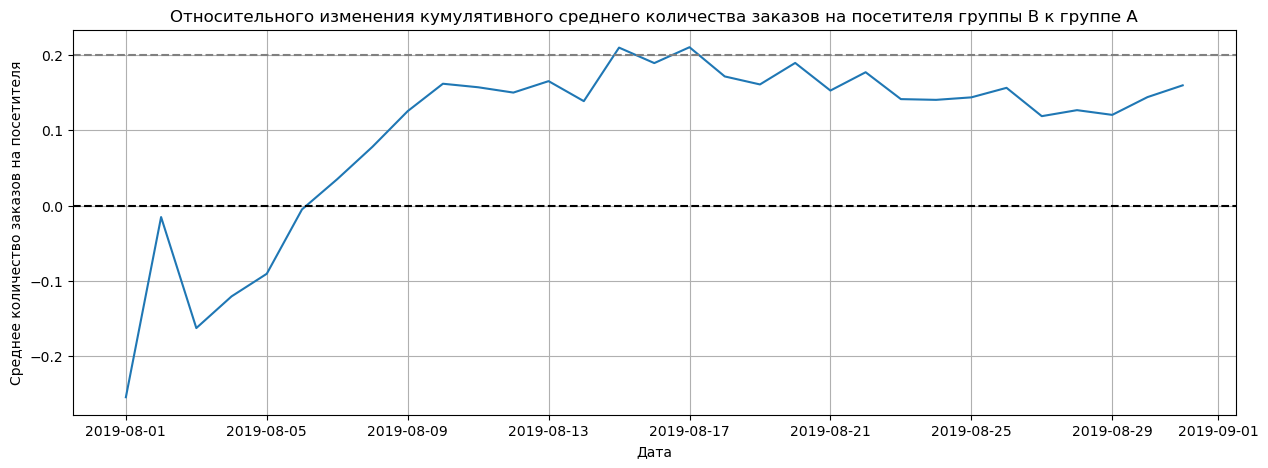

In [34]:
cumulativeV_A['avg_num_of_orders'] = cumulativeV_A['orders']/cumulativeV_A['visitors']
cumulativeV_B['avg_num_of_orders'] = cumulativeV_B['orders']/cumulativeV_B['visitors']

mergedCumulativeAv = cumulativeV_A[['date','avg_num_of_orders']].merge(cumulativeV_B[['date','avg_num_of_orders']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeAv['date'], mergedCumulativeAv['avg_num_of_ordersB']/mergedCumulativeAv['avg_num_of_ordersA']-1, label="Относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")

plt.title('Относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

_**Вывод:**_ В начале выбранного периода относительное изменение кумулятовного среднего количество заказов на посетителя группы А было больше, чем у В, хотя замечался скачок 02.08.2019 в сторону группы В, возможно была какая-то акция. Затем лидировать стлала группа В и начиная с середины периода относительное изменение кумулятовного среднего количество заказов на посетителя стабилизировалось при лидерстве группы Б.

### Построим точечный график количества заказов по пользователям

     visitor_id  transaction_id
908  3967698036               3
55    249864742               3
478  2108163459               3
687  2988190573               3
890  3908431265               3
138   611059232               3
632  2742574263               3
157   678354126               2
323  1404560065               2
452  1985475298               2


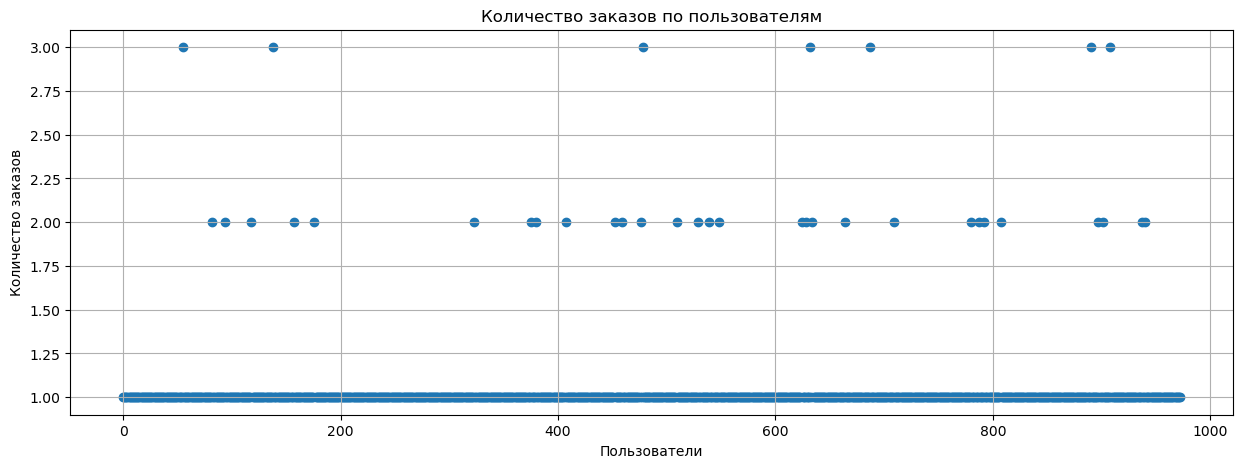

In [35]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']

print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10))

plt.figure(figsize=(15,5))
plt.grid()
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction_id']) 
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.show()


_**Вывод:**_ Количества 1 заказа, совершенного пользователем, очень много, а вот 2 и 3 заказов намного меньше. Возможно, это аномалии. Чтобы это проверить необходимо построить 95-й и 99-й перцентили количества заказов на пользователя.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [36]:
print('95 и 99 количества заказов на пользователя: ', np.percentile(ordersByUsers['transaction_id'], [95, 99])) 

95 и 99 количества заказов на пользователя:  [1. 2.]


_**Вывод:**_ Не более 5% пользователей оформляли больше 1 заказа. И 1% пользователей заказывали более 2. То есть, всё, что больше 1- аномалия.

### Построим точечный график стоимостей заказов

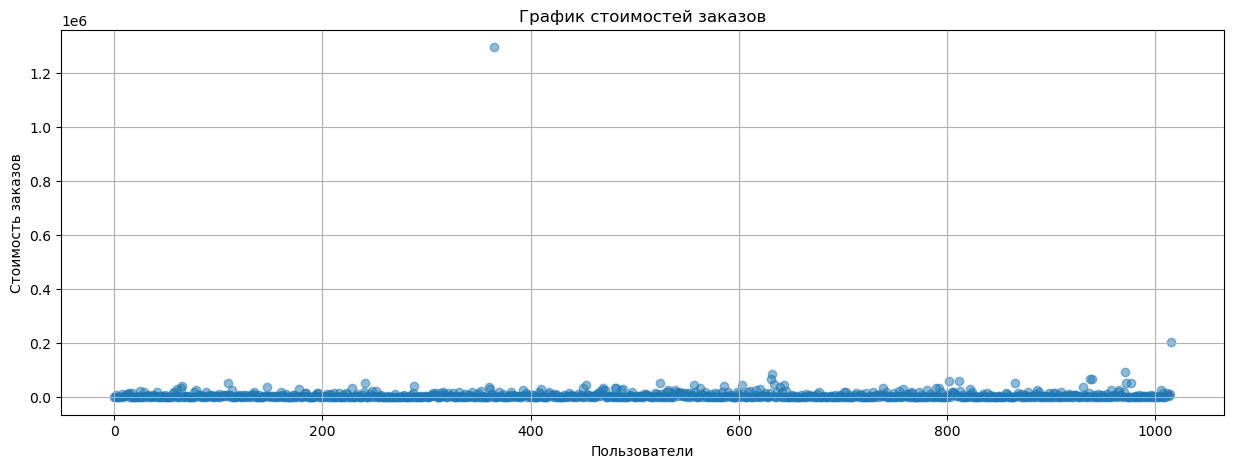

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

На графике видно две аномалии. Одна более 1.2 млн руб. Вторая около 200 тысяч рыблей. 

Для большей наглядности построим ещё один график, исключая выбросы, то есть менее 200 тысяч рублей.

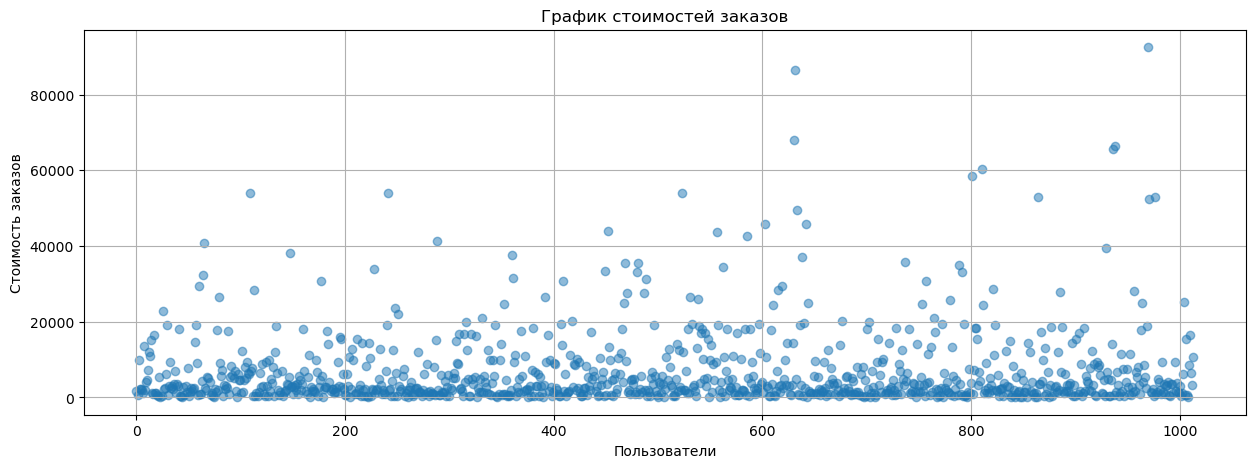

In [38]:
orders_filtered = orders[orders['revenue'] < 200000]['revenue']
x_values = pd.Series(range(0,len(orders_filtered)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders_filtered, alpha=0.5);

_**Вывод:**_ Были выявлены две аномалии Одна более 1.2 млн руб. Вторая около 200 тысяч рыблей. Все остальные заказы кроме двух аномальных точек не превышают 100 тысяч рублей.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных пользователей.

In [39]:
print('95 и 99 стоимости заказов на пользователя: ', np.percentile(orders['revenue'], [95, 99])) 

95 и 99 стоимости заказов на пользователя:  [26785. 53904.]


_**Вывод:**_  Не более, чем у 5% пользователей чек дороже 26 785 рублей, и только не более чем у 1% пользователей чек дороже 53 904 рублей. Тогда границей для определения аномальных пользователей будет 26 785 рублей.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы. 

Нулевая: среднее количество заказов на посетителя группы А и В по "сырым" данным равно, различий нет.

Альтернативная: среднее количество заказов на посетителя группы А и В по "сырым" данным не равно, различия есть.

α=5% критический уровень статистической значимости.
Гля группы В гипотезы аналогичные.

In [40]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 
                              'ordersCummulativeB', 
                              'revenueCummulativeB']

In [41]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [42]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Отношение B к A = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.011
Отношение B к A = 0.160


_**Вывод:**_ Так как p-value < 0,05, мы отвергаем нулевую гипотизу, которая гласила, что по "сырым" данным среднее количество заказов на посетителя группы А и В равно, различий нет. Относительный проигрыш группы A равен 16%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы. 

Нулевая: средний чек заказа группы А и В по "сырым" данным равно, различий нет.

Альтернативная: средний чек заказа на посетителя группы А и В по "сырым" данным не равно, различия есть.

α=5% критический уровень статистической значимости.
Гля группы В гипотезы аналогичные.

In [43]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Отношение B к A = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.829
Отношение B к A = 0.287


_**Вывод:**_ Так как p-value > 0,05, мы принимаем нулевую гипотизу, которая гласила, что по "сырым" данным средние чеки заказа группы А и В равны, различий нет. Средний чек группы В больше, чем у А на 28%. Возможно, дело в выбросах.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сформулируем гипотезы. 

Нулевая: среднее количество заказов на посетителя группы А и В по "очищенным" данным равно, различий нет.

Альтернативная: среднее количество заказов на посетителя группы А и В по "очищенным" данным не равно, различия есть.

α=5% критический уровень статистической значимости.
Гля группы В гипотезы аналогичные.

Вспомним, что мы берем за аномалии количество заказов больше 1 и стоимость заказа больше 26 785 рублей.

In [44]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['user_id'], ordersByUsersB[ordersByUsersB['orders'] > 1]['user_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitor_id']
abnormal_users = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormal_users.head(5))
print("Всего аномальных пользователей =" ,len(abnormal_users)) 


568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
Всего аномальных пользователей = 86


In [45]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormal_users))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormal_users))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

In [46]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Отношение B к A = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.016
Отношение B к A = 0.174


_**Вывод:**_ Так как p-value < 0,05, оно практически не изменилось, мы отвергаем нулевую гипотизу, которая гласила, что по "очищенным" данным среднее количество заказов на посетителя группы А и В равно, различий нет. Относительный проигрыш группы A равен 17,4%. Относительный проигрыш практически не изменился.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы. 

Нулевая: средний чек заказа группы А и В по "очищенным" данным равно, различий нет.

Альтернативная: средний чек заказа на посетителя группы А и В по "очищенным" данным не равно, различия есть.

α=5% критический уровень статистической значимости.
Гля группы В гипотезы аналогичные.

In [47]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]))

print("Отношение B к A = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.727
Отношение B к A = -0.034


_**Вывод:**_ Так как p-value > 0,05, оно незначительно упало, мы принимаем нулевую гипотизу, которая гласила, что по "очищенным" данным средние чеки заказа группы А и В равны, различий нет. Средний чек группы В меньше, чем у А на 3,4%. При "сырых" данных средний чек группы В был выше А на 28%. Такая разница возникла из-за выбросов, который мы исключили, когда "очистили" данные.

### Примем решение по результатам теста и объясните его. 

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

После выполения тестирований можно сказать, что по "сырым" и "очищенным" дынным среднее количество заказов на посетителя группы А и В не равно. При этом относительный проигрыш группы А составляет примерно 17%. А вот средний чек по результатам тестирования не различается. При этом группа В проигрывает всего примерно на 2% по "очищенным" данным (по "сырым" данным выигрыш группы В составлял 28% из-за аномалий). Исходя из проведенных тестов можно принять решение, что группа В одержалал победу и остановить тест.

### Итоговый вывод

Таким образом, в ходе работы мы провели подготовку таблицы hypothesis. Выяснили, что в ней нет дубликатов и повторов, привели названия колонок к одному регистру. Применили фреймворки ICE и RICE. При применении фреймворка ICE приотизация была: 8, 0, 7. А при применении фреймворка RICE 7, 2, 0. Отличия в топах методов связано с тем, что фреймворк RICE учитывает параметр Reach, который показывает охват пользователей, которых заденет измененние. В фреймворке ICE этот параметр не учитывается.

Затем провели подготовку таблиц orders и visitors. В которых мы изменили форматы некоторых ячеек на datetime64 и изменили названия колонок (привели к одному регистру и добавили "_").

Далее, мы провели проверку на пересечение групп, в ходе которой выяснилось, что 58 пользователей входят в обе группы. Так как доля пользователей из обеих групп составляет 5,6%, что больше 1%, эти данные могут значительно повлиять на результат. Поэтому мы их удалили.

Построили график кумулятивной выручки по группам.Выручка в группе В в первой половине месяца росла чуть быстрее группы А. Затем, 19.08.2019 выручка в группе В резко поднялась, что связано с аномалией.

Построили график кумулятивного среднего чека по группам.Аналогично графику кумулякотивной выручке наблюдается резкий скачок в группе В 19.08.2019, связанный с аномалией. В первой поломине периода группа В немного преобладала, хотя в некоторые дни группа А опережала группу В по среднему чеку.

Построили график относительного изменения кумулятивного среднего чека группы B к группе A. В основном график находится выше 0 и группа В преобладает. Только в период с 12.08.2019 по 18.08.2019 график находится ниже 0 и средний чек группы А был соответственно больше группы В. Аналогично педидущим двум графика наблюдается резкий скачок в группе В 19.08.2019, связанный с аномалией.

Построили график кумулятивного среднего количества заказов на посетителя по группам. В начале выбранного периода среднее количество заказов на посетителя группы А было больше, чем у В. Затем показатель группы А начал резко падать, а группы В наоборот расти. С середины периода среднее количество заказов на посетителя начинает стабилизироваться в обоих группах. В целом, можно сказать, что среднее количество заказов на посетителя группы В больше группы А.

Построили график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. В начале выбранного периода относительное изменение кумулятовного среднего количество заказов на посетителя группы А было больше, чем у В, хотя замечался скачок 02.08.2019 в сторону группы В, возможно была какая-то акция. Затем лидировать стлала группа В и начиная с середины периода относительное изменение кумулятовного среднего количество заказов на посетителя стабилизировалось при лидерстве группы Б.

Построили точечный график количества заказов по пользователям. Не более 5% пользователей оформляли больше 1 заказа. И 1% пользователей заказывали более 2. То есть, всё, что больше 1- аномалия.

Посчитали 95-й и 99-й перцентили количества заказов на пользователя. Были выявлены две аномалии Одна более 1.2 млн руб. Вторая около 200 тысяч рыблей. Все остальные заказы кроме двух аномальных точек не превышают 100 тысяч рублей.

Построили точечный график стоимостей заказов. Были выявлены две аномалии Одна более 1.2 млн руб. Вторая около 200 тысяч рыблей. Все остальные заказы кроме двух аномальных точек не превышают 100 тысяч рублей.

Посчитали 95-й и 99-й перцентили стоимости заказов. Не более, чем у 5% пользователей чек дороже 26 785 рублей, и только не более чем у 1% пользователей чек дороже 53 904 рублей. Тогда границей для определения аномальных пользователей будет 26 785 рублей.

Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Так как p-value < 0,05, мы отвергаем нулевую гипотизу, которая гласила, что по "сырым" данным среднее количество заказов на посетителя группы А и В равно, различий нет. Относительный проигрыш группы A равен 16%

Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Так как p-value > 0,05, мы принимаем нулевую гипотизу, которая гласила, что по "сырым" данным средние чеки заказа группы А и В равны, различий нет. Средний чек группы В больше, чем у А на 28%. Возможно, дело в выбросах.

Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. ак как p-value < 0,05, оно практически не изменилось, мы отвергаем нулевую гипотизу, которая гласила, что по "очищенным" данным среднее количество заказов на посетителя группы А и В равно, различий нет. Относительный проигрыш группы A равен 17,4%. Относительный проигрыш практически не изменился. 

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Так как p-value > 0,05, оно незначительно упало, мы принимаем нулевую гипотизу, которая гласила, что по "очищенным" данным средние чеки заказа группы А и В равны, различий нет. Средний чек группы В меньше, чем у А на 3,4%. При "сырых" данных средний чек группы В был выше А на 28%. Такая разница возникла из-за выбросов, который мы исключили, когда "очистили" данные.

Приняли решение по результатам теста и объясните его. Остановить тест, зафиксировать победу одной из групп. После выполения тестирований можно сказать, что по "сырым" и "очищенным" дынным среднее количество заказов на посетителя группы А и В не равно. При этом относительный проигрыш группы А составляет примерно 17%. А вот средний чек по результатам тестирования не различается. При этом группа В проигрывает всего примерно на 2% по "очищенным" данным (по "сырым" данным выигрыш группы В составлял 28% из-за аномалий). Исходя из проведенных тестов можно принять решение, что группа В одержалал победу и остановить тест.